In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import matplotlib.colors as mcolors
import pandas as pd
from numpy import genfromtxt
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 18})

def pll_scan_test(boardNum,scale,fname,indir,ECOND=False):
    if ECOND==True:
        ## load the data
        data2 = genfromtxt(f"{indir}/{fname}_autolocks.csv", delimiter=',')
        data = pd.read_csv(f"{indir}/{fname}_locks.csv", header=None,skiprows=1).to_numpy()


        ## Set some variables
        allowed_cap_bank_vals=np.array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
                                      13,  14,  15,  24,  25,  26,  27,  28,  29,  30,  31,  56,  57,
                                      58,  59,  60,  61,  62,  63, 120, 121, 122, 123, 124, 125, 126,
                                      127, 248, 249, 250, 251, 252, 253, 254, 255, 504, 505, 506,       507,
                                      508, 509, 510, 511])

        capSettings = np.zeros(len(data2[1]))
        a = [] ## list of cap settings where it locks
        b = [] ## list of frequencies that correspond to a


        for i in range (len(data2[1])):
            for j in range(56):
                if data2[1][i] == allowed_cap_bank_vals[j]:
                    capSettings[i] = j

        for i in range(len(data2[1])):
            if data2[2][i] == 1:
                a.append(capSettings[i])
                b.append(data2[0][i])

        x = np.array(a)
        y = np.array(b)


        ## Make the plots
        b,a=np.meshgrid(np.arange(40,50,(1/scale)),np.arange(56))
        plt.hist2d(b.flatten(),a.flatten(),weights=data.T.flatten(),bins=(np.arange(40,51,(1/scale))-(0.5/scale),np.arange(57)-0.5),cmap='Blues', label ="PLL Lock")
        plt.scatter((y/8),x,color="red",label="Automatic Lock")
        #plt.colorbar().set_label(label='PLL Locking Status',size=32)
        handles, labels = plt.gca().get_legend_handles_labels()
        patch = mpatches.Patch(color='#08306b', label='PLL Lock with VCO Override')
        handles.append(patch) 

        plt.legend(handles=handles, loc='lower left')
        plt.xlabel('Frequency Setting (MHz)', size=32)
        plt.ylabel('CapBank Select Setting', size=32)
        plt.title(f"ECON-D-P1 Board {boardNum} PLL Scan")
        plt.xlim([35,50])
        plt.savefig(f'./ECOND-PLL-1_{scale}_BoardNum{boardNum}.png',dpi=300, facecolor = "w")
        plt.figure()
    else: 
        mainlist=[]
        with open(f"./{fname}.txt") as f:
            mainlist = [list(literal_eval(line)) for line in f]
        pllSettings = np.array(mainlist)
        b,a=np.meshgrid(np.arange(35,44,(1/32)),np.arange(56))
        plt.hist2d(b.flatten(),a.flatten(),weights=pllSettings.T.flatten(),bins=(np.arange(34,45,(1/32)),np.arange(57)),cmap='Blues')
        plt.xlabel('Reference Clock Frequency Setting (MHz)', size=32)
        plt.ylabel('CapBank Select Setting', size=32)
        handles, labels = plt.gca().get_legend_handles_labels()
        patch = mpatches.Patch(color='#08306b', label='PLL Lock with VCO Override')
        handles.append(patch)
        plt.legend(handles=handles, loc='lower left')
        plt.title("ECON-T-P1")
        plt.axvline(40)
        plt.rcParams.update({'font.size': 15})
        plt.xlim([35,50])
        plt.savefig(f'./ECONT-PLL-1_{scale}_BoardNum{boardNum}.png.png',dpi=300, facecolor = "w")
        plt.figure()




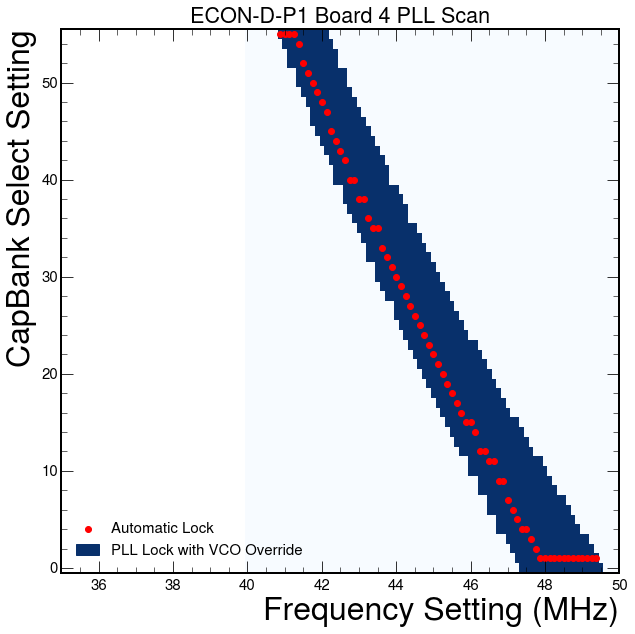

<Figure size 720x720 with 0 Axes>

In [15]:
pll_scan_test(4,8,"hexa48_board4_plltester_freqscan_autolocking","econ_plotting/exampleData",ECOND=True)